# Schrödinger Equation

The ``FinDiff`` objects are designed to easily and quickly apply partial derivatives
to given *numpy* arrays. However, sometimes it is useful to represent
the linear differential operator as a matrix. Consider for instance the
stationary Schrödinger equation in 1D:

$$
\left(-\frac{1}{2}\frac{d^2}{d x^2} + V(x)\right)\psi= E \psi
$$

Discretize the $x$-axis:

In [1]:
import numpy as np

x = np.linspace(-10, 10, 1001)

We can model the kinetic energy term using the `FinDiff` class:

In [2]:
from findiff import FinDiff

d2_dx2 = -0.5 * FinDiff(0, x[1]-x[0], 2)

The Schrödinger equation is an eigenvalue problem. So it is easy to solve
once we have the matrix representation. But this is simple in *findiff*:

In [3]:
T = d2_dx2.matrix(x.shape)

The matrix representation is a SciPy sparse matrix:

In [4]:
print(T.shape)
print(type(T))

(1001, 1001)
<class 'scipy.sparse._csr.csr_matrix'>


We still need to add the potential energy part. For concreteness let's choose the
harmonic energy potential $V(x) = x^2 / 2$.

In [5]:
from scipy.sparse import diags
V = diags(x**2 / 2)
V.shape

(1001, 1001)

Now we can use the sparse eigensolver from SciPy to solve the Schrödinger equation:

In [6]:
from scipy.sparse.linalg import eigs
H = T + V
energies, states = eigs(H, k=10, which='SR')

In [7]:
energies

array([0.4999875 +0.j, 1.4999375 +0.j, 2.49983749+0.j, 3.49968747+0.j,
       4.49948744+0.j, 5.49923739+0.j, 6.49893733+0.j, 7.49858723+0.j,
       8.49818711+0.j, 9.49773696+0.j])

which matches the spectrum of the 1D oscillator. The states also look as expected (up to signs):

In [8]:
states.shape

(1001, 10)

(-5.0, 5.0)

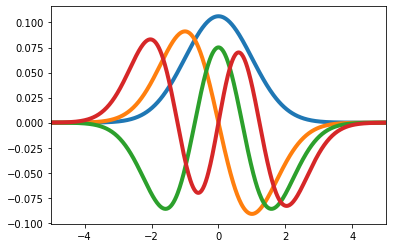

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['font.size'] = 22

for psi in states.T[:4]:
    plt.plot(x, psi.real, '-')

plt.xlim(-5, 5)